In [1]:
import yfinance as yf

# Descarga histórico de Bancolombia ADR (CIB)
df_principal = yf.download(
    "CIB", 
    start="2015-05-11", 
    end="2025-05-9"
)

# Filtrar solo la columna Open y mover el índice Date a columna
df_principal = df_principal[['Open']].reset_index()

print(df_principal.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date       Open
Ticker                   CIB
0      2015-05-11  21.664397
1      2015-05-12  21.527122
2      2015-05-13  21.702272
3      2015-05-14  21.801662
4      2015-05-15  21.688063


In [2]:
import pandas as pd

# Lee las dos hojas como texto
archivo = "C:/Users/Usuario/Documents/especializacion/monografia/segunda entrega/graficador_series (1) (1).xlsx"
sheets = pd.read_excel(
    archivo,
    sheet_name=["Datos"],
    dtype=str
)

df_secundario =  sheets["Datos"]

# 1) Convertir a datetime, indicando dayfirst para DD/MM/YYYY
df_secundario['Fecha'] = pd.to_datetime(
    df_secundario['Fecha'],
    format="%d/%m/%Y",
    dayfirst=True,
    errors="raise"
)

# 2) (Opcional) Si además quieres renombrar la columna a 'Date'
df_secundario.rename(columns={'Fecha': 'Date'}, inplace=True)


In [3]:
# Por ejemplo, unir con guión bajo los niveles que haya
df_principal.columns = [
    "_".join(filter(None, col)).strip()
    for col in df_principal.columns.values
]

df_principal = df_principal.reset_index()

print("Niveles de columnas en principal:", df_principal.columns.nlevels)
print("Niveles de columnas en secundario:", df_secundario.columns.nlevels)

Niveles de columnas en principal: 1
Niveles de columnas en secundario: 1


In [4]:
df_merged = df_principal.merge(
    df_secundario,
    on='Date',
    how='left',
    suffixes=('', '_sec')
)

In [5]:
import numpy as np

cols = [
    "M1, mensual(Dato fin de mes)",
    "Inflación total(Dato fin de mes)",
    "Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)",
    "Tasa de desempleo - total nacional(Dato fin de mes)"
]

# Reemplaza todos los "-" por NaN solo en esas columnas
df_merged[cols] = df_merged[cols].replace("-", np.nan)

# Comprueba que ahora pandas los reconoce como NaN
print(df_merged[cols].isna().sum())


M1, mensual(Dato fin de mes)                                                              2430
Inflación total(Dato fin de mes)                                                          2429
Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)    2489
Tasa de desempleo - total nacional(Dato fin de mes)                                       2430
dtype: int64


## Analisis univariado de las variables macroeconomicas


=== Estadísticos descriptivos de M1 (mensual) ===
count     85.000000
mean     137.774741
std       39.016123
min       89.404000
25%       96.962000
50%      140.447000
75%      176.875000
max      207.143000
Name: M1, mensual(Dato fin de mes), dtype: float64 



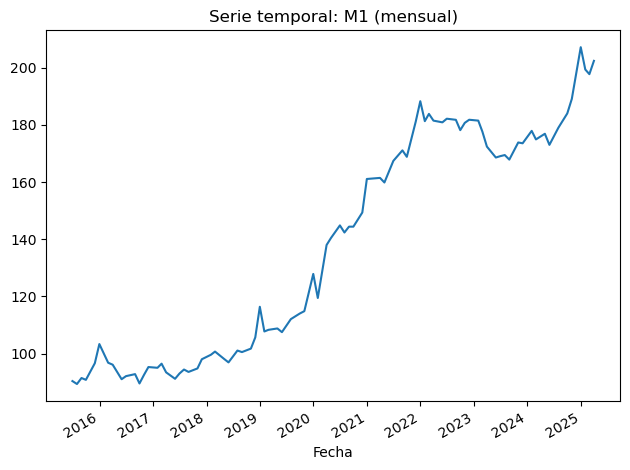

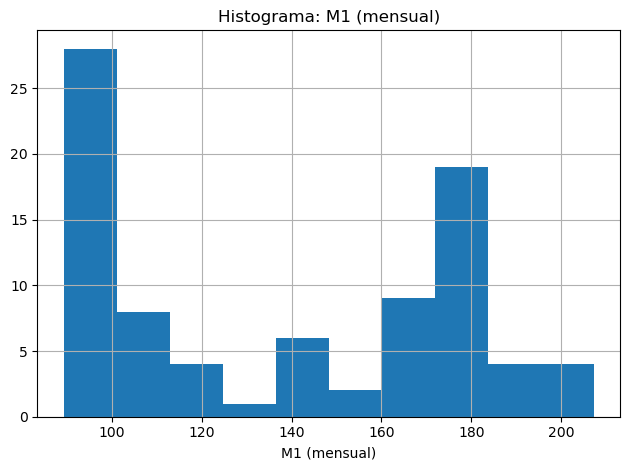

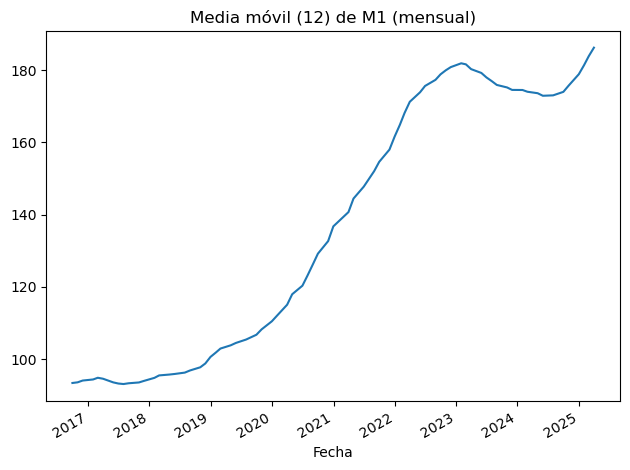

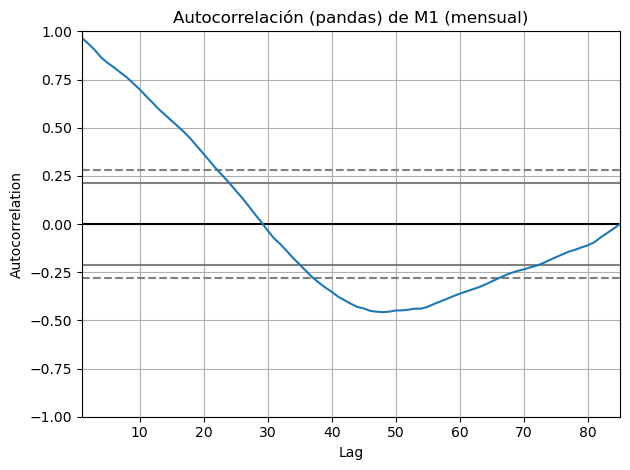

--- Prueba ADF para M1 (mensual) ---
ADF Statistic: 0.0775  |  p-value: 0.9645

--- Prueba KPSS para M1 (mensual) ---
KPSS Statistic: 1.4345  |  p-value: 0.0100



C:\Users\Usuario\AppData\Local\Temp\ipykernel_13416\3578055809.py:78: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(s, regression='c', nlags='auto')


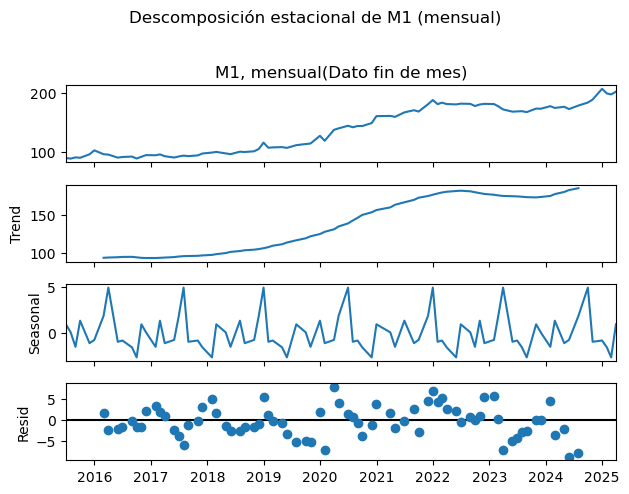

<Figure size 640x480 with 0 Axes>

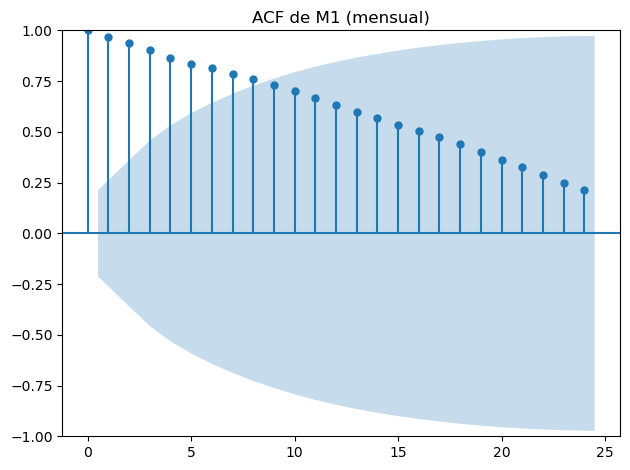

<Figure size 640x480 with 0 Axes>

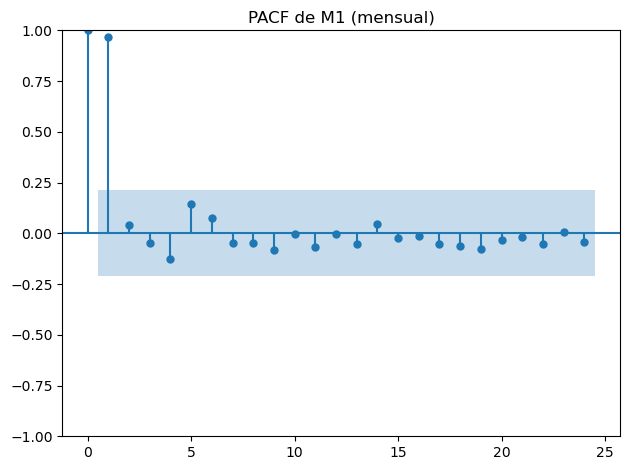


=== Estadísticos descriptivos de Inflación total (mensual) ===
count    86.000000
mean      5.926628
std       3.194954
min       1.490000
25%       3.537500
50%       5.170000
75%       7.920000
max      13.340000
Name: Inflación total(Dato fin de mes), dtype: float64 



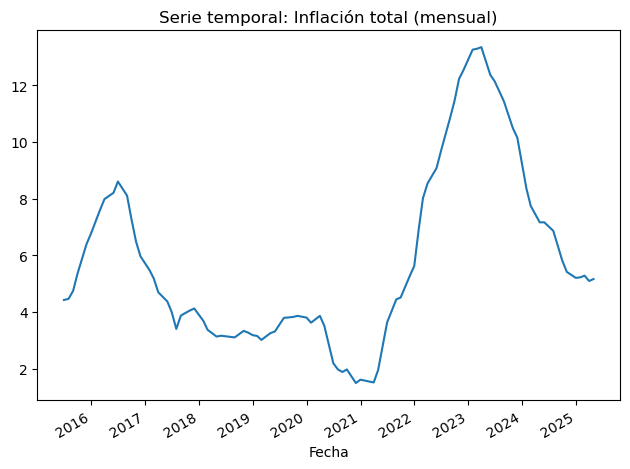

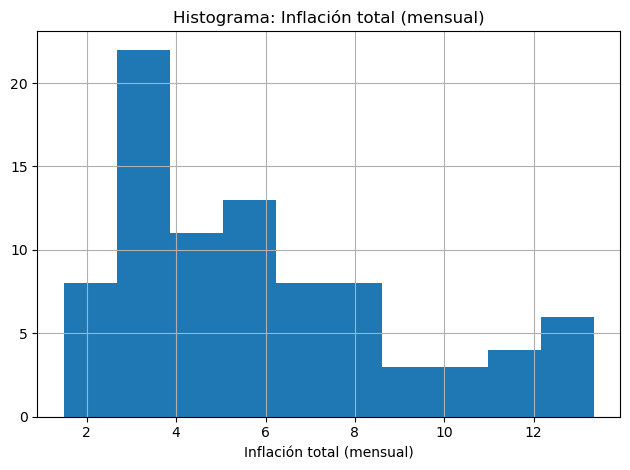

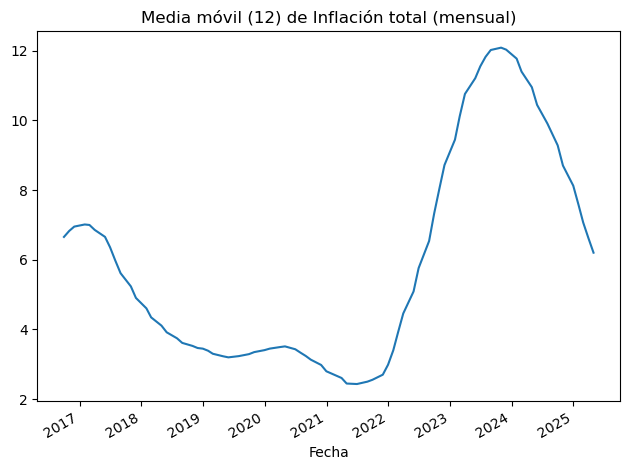

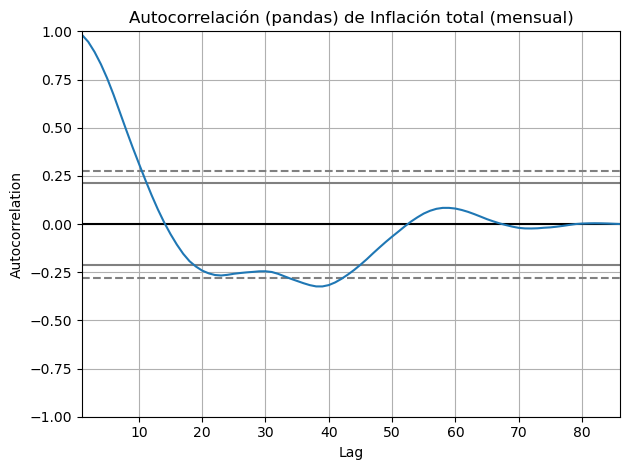

--- Prueba ADF para Inflación total (mensual) ---
ADF Statistic: -2.9387  |  p-value: 0.0410

--- Prueba KPSS para Inflación total (mensual) ---
KPSS Statistic: 0.4245  |  p-value: 0.0666



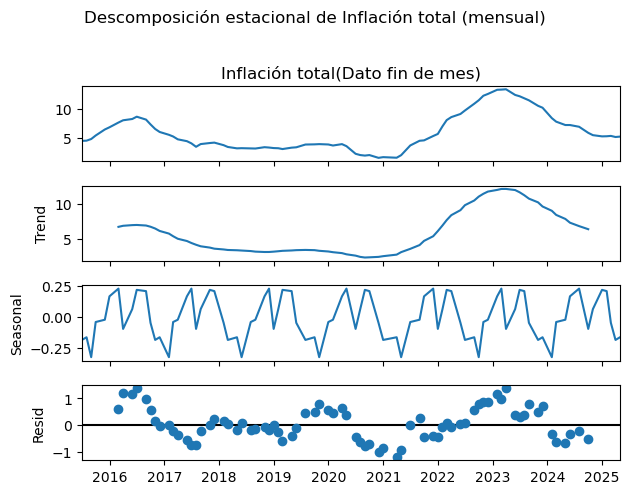

<Figure size 640x480 with 0 Axes>

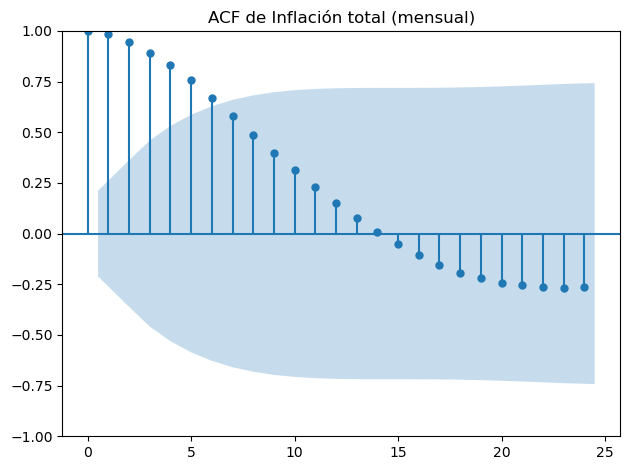

<Figure size 640x480 with 0 Axes>

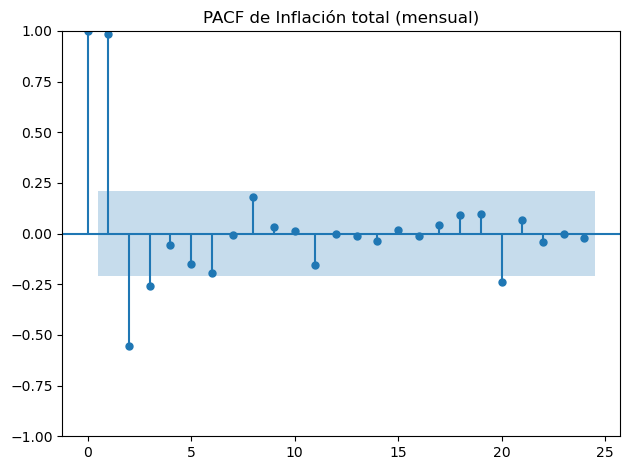


=== Estadísticos descriptivos de Tasa de desempleo (mensual) ===
count    85.000000
mean     11.119294
std       2.662323
min       7.560000
25%       9.300000
50%      10.330000
75%      11.960000
max      20.910000
Name: Tasa de desempleo - total nacional(Dato fin de mes), dtype: float64 



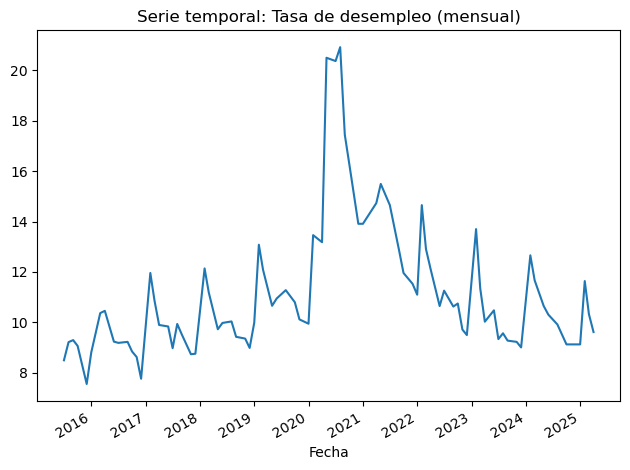

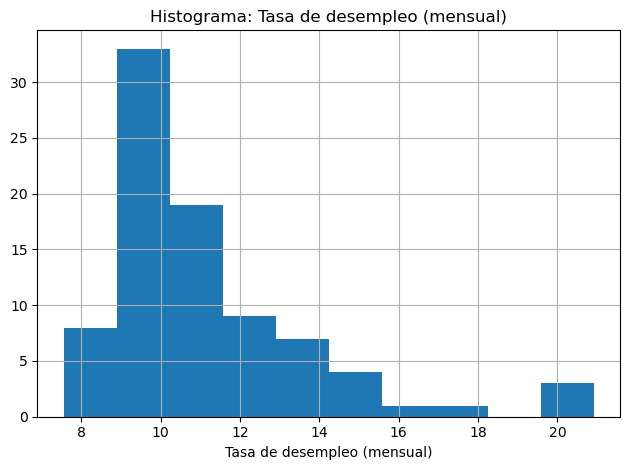

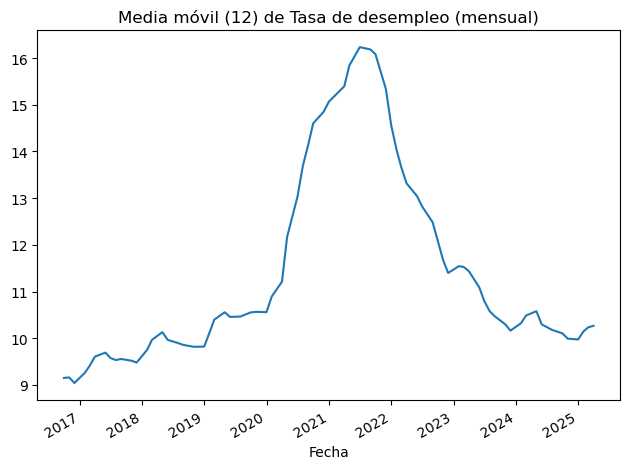

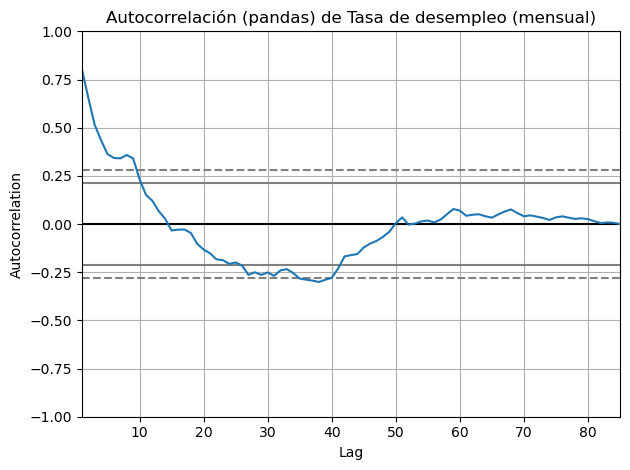

--- Prueba ADF para Tasa de desempleo (mensual) ---
ADF Statistic: -2.9922  |  p-value: 0.0356

--- Prueba KPSS para Tasa de desempleo (mensual) ---
KPSS Statistic: 0.3092  |  p-value: 0.1000



C:\Users\Usuario\AppData\Local\Temp\ipykernel_13416\3578055809.py:78: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(s, regression='c', nlags='auto')


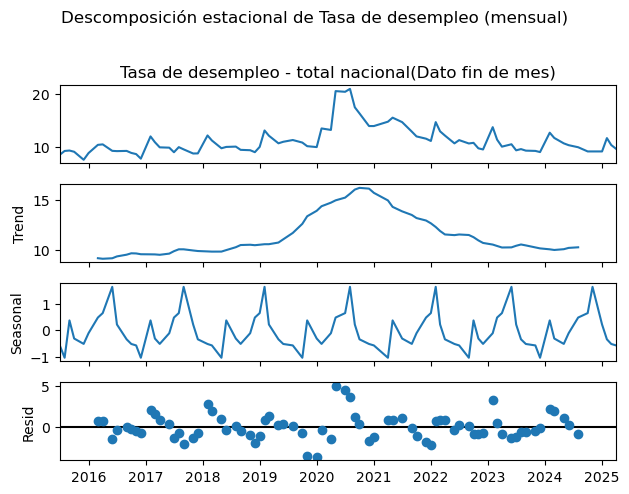

<Figure size 640x480 with 0 Axes>

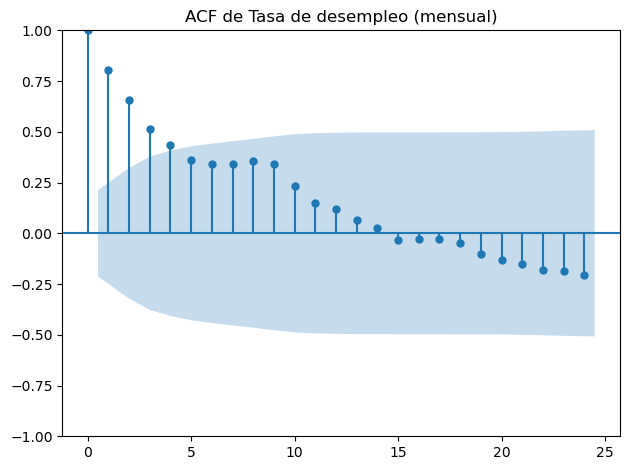

<Figure size 640x480 with 0 Axes>

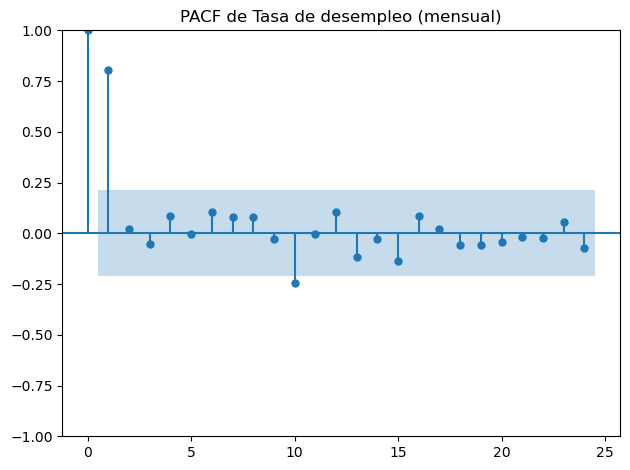


=== Estadísticos descriptivos de Crecimiento PIB real (trimestral) ===
count    26.000000
mean      2.984231
std       6.781030
min     -16.730000
25%       1.412500
50%       2.490000
75%       3.457500
max      18.560000
Name: Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre), dtype: float64 



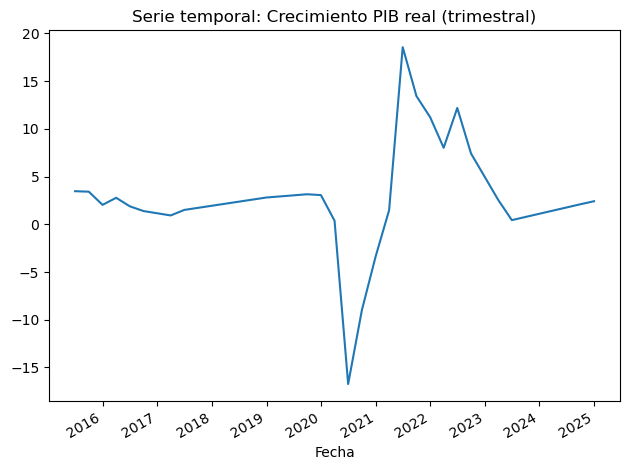

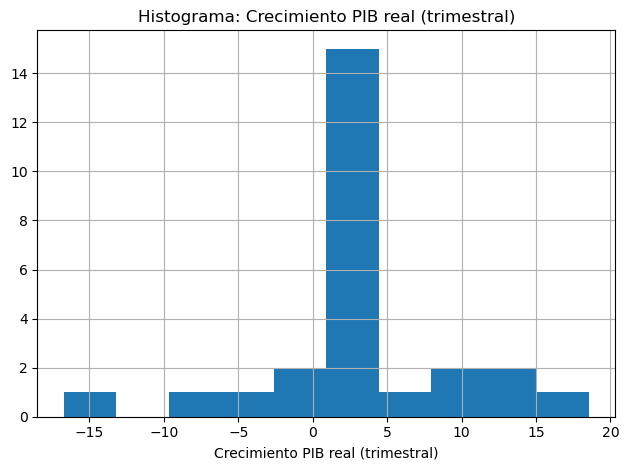

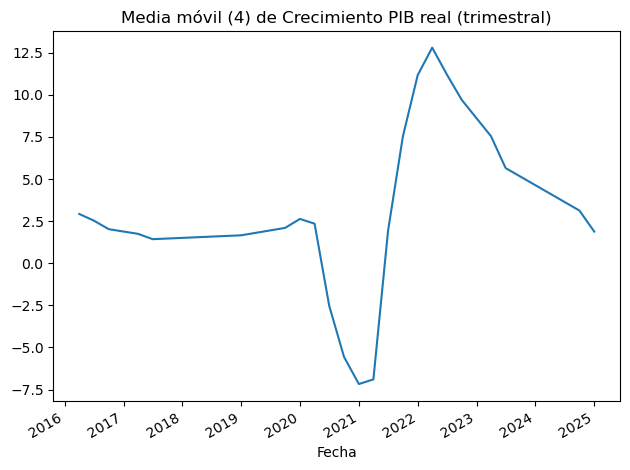

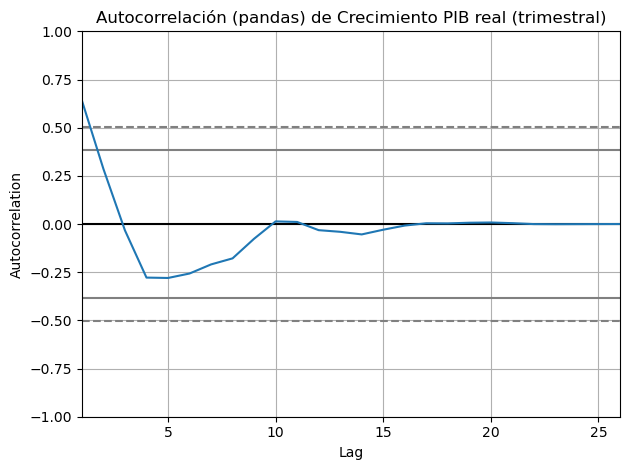

--- Prueba ADF para Crecimiento PIB real (trimestral) ---
ADF Statistic: -2.2428  |  p-value: 0.1911

--- Prueba KPSS para Crecimiento PIB real (trimestral) ---
KPSS Statistic: 0.1386  |  p-value: 0.1000



C:\Users\Usuario\AppData\Local\Temp\ipykernel_13416\3578055809.py:78: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, *_ = kpss(s, regression='c', nlags='auto')


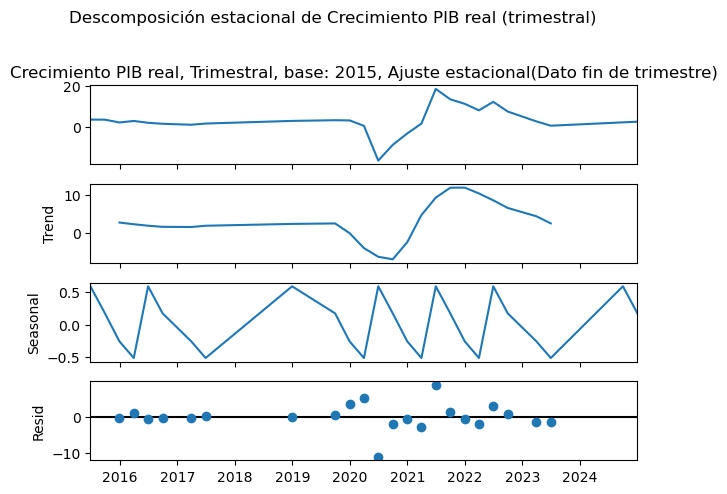

<Figure size 640x480 with 0 Axes>

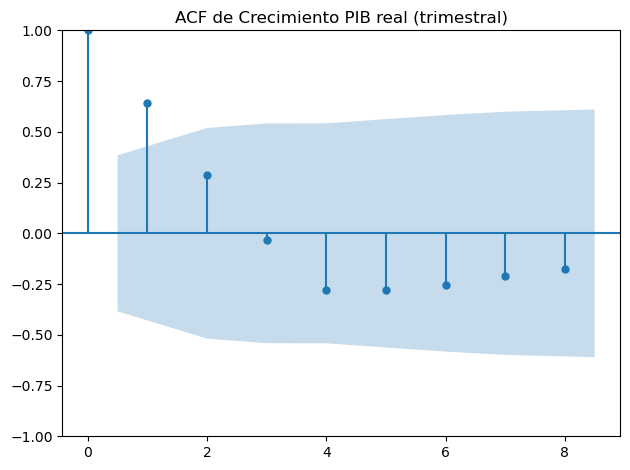

<Figure size 640x480 with 0 Axes>

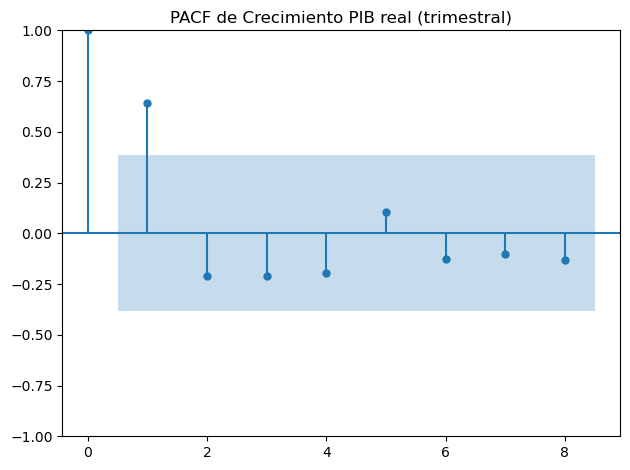

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot

# Definimos cada serie con: (columna, título, period, ventana rolling, lags ACF/PACF)
series_info = [
    ("M1, mensual(Dato fin de mes)",
     "M1 (mensual)",
     12,    # period = 12 meses
     12,    # rolling window = 12 meses
     24),   # lags = 24 meses
    ("Inflación total(Dato fin de mes)",
     "Inflación total (mensual)",
     12,
     12,
     24),
    ("Tasa de desempleo - total nacional(Dato fin de mes)",
     "Tasa de desempleo (mensual)",
     12,
     12,
     24),
    ("Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)",
     "Crecimiento PIB real (trimestral)",
     4,     # period = 4 trimestres
     4,     # rolling window = 4 trimestres
     8)     # lags = 8 trimestres
]

for col, title, period, rw, lags in series_info:
    # 1) Extraemos y limpiamos
    df_temp = (
        df_merged[["Date", col]]
        .dropna(subset=[col])
    )
    df_temp["Date"] = pd.to_datetime(df_temp["Date"])
    df_temp.set_index("Date", inplace=True)

    s = (
        df_temp[col]
        .astype(str)
        .str.strip()
        .str.replace(",", ".", regex=False)
        .str.replace("%",   "",   regex=False)
    )
    s = pd.to_numeric(s, errors="coerce").dropna()

    # 2) Estadísticos descriptivos
    print(f"\n=== Estadísticos descriptivos de {title} ===")
    print(s.describe(), "\n")

    # 3) Serie temporal + Histograma
    plt.figure(); s.plot(title=f"Serie temporal: {title}"); plt.xlabel("Fecha"); plt.tight_layout(); plt.show()
    plt.figure(); s.hist(); plt.title(f"Histograma: {title}"); plt.xlabel(title); plt.tight_layout(); plt.show()

    # 4) Media móvil
    plt.figure()
    s.rolling(window=rw).mean().plot(title=f"Media móvil ({rw}) de {title}")
    plt.xlabel("Fecha")
    plt.tight_layout()
    plt.show()

    # 5) Autocorrelación rápida (pandas)
    plt.figure()
    autocorrelation_plot(s)
    plt.title(f"Autocorrelación (pandas) de {title}")
    plt.tight_layout()
    plt.show()

    # 6) Prueba ADF
    adf_stat, adf_p, *_ = adfuller(s)
    print(f"--- Prueba ADF para {title} ---")
    print(f"ADF Statistic: {adf_stat:.4f}  |  p-value: {adf_p:.4f}\n")

    # 7) Prueba KPSS
    kpss_stat, kpss_p, *_ = kpss(s, regression='c', nlags='auto')
    print(f"--- Prueba KPSS para {title} ---")
    print(f"KPSS Statistic: {kpss_stat:.4f}  |  p-value: {kpss_p:.4f}\n")

    # 8) Descomposición estacional
    decomp = seasonal_decompose(s, model='additive', period=period)
    fig = decomp.plot()
    plt.suptitle(f"Descomposición estacional de {title}", y=1.02)
    plt.tight_layout()
    plt.show()

    # 9) ACF y PACF
    plt.figure(); plot_acf(s, lags=lags);  plt.title(f"ACF de {title}");  plt.tight_layout(); plt.show()
    plt.figure(); plot_pacf(s, lags=lags, method='ywm'); plt.title(f"PACF de {title}"); plt.tight_layout(); plt.show()


## Analisis univariado CIB

=== Estadísticos descriptivos de Open_CIB ===
count    2515.000000
mean       21.026282
std         4.919855
min         9.392027
25%        17.414486
50%        20.026226
75%        24.394766
max        41.779999
Name: Open_CIB, dtype: float64 



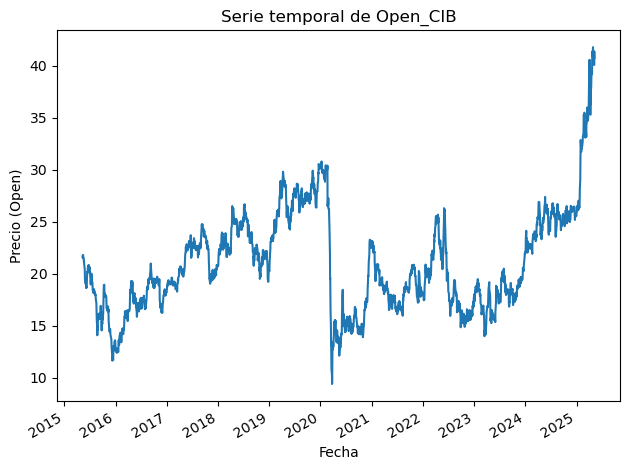

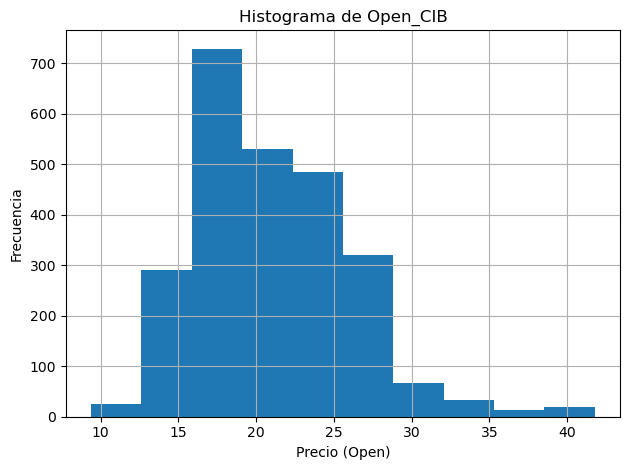

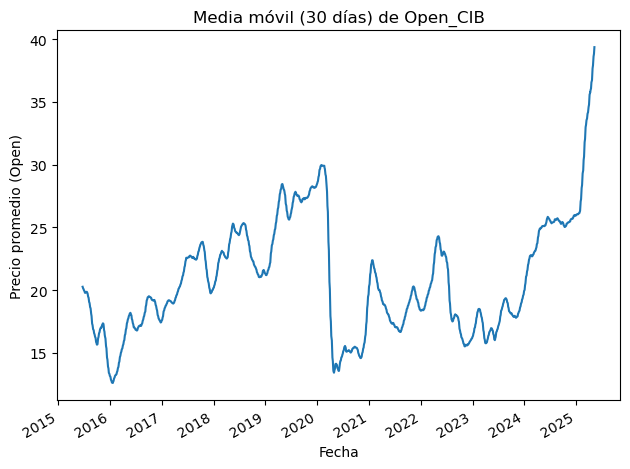

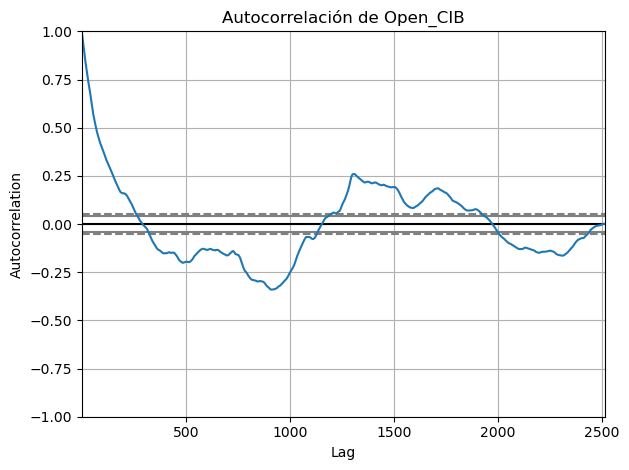

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Prepara el DataFrame: asegúrate de que Date es datetime y ponlo de índice
df = df_merged.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 2) Estadísticos descriptivos básicos
print("=== Estadísticos descriptivos de Open_CIB ===")
print(df['Open_CIB'].describe(), "\n")

# 3) Serie temporal de Open_CIB
plt.figure()
df['Open_CIB'].plot()
plt.title("Serie temporal de Open_CIB")
plt.xlabel("Fecha")
plt.ylabel("Precio (Open)")
plt.tight_layout()
plt.show()

# 4) Histograma de frecuencias
plt.figure()
df['Open_CIB'].hist()
plt.title("Histograma de Open_CIB")
plt.xlabel("Precio (Open)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

# 5) Media móvil (rolling mean) de 30 días
plt.figure()
df['Open_CIB'].rolling(window=30).mean().plot()
plt.title("Media móvil (30 días) de Open_CIB")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio (Open)")
plt.tight_layout()
plt.show()

# 6) (Opcional) Autocorrelación
from pandas.plotting import autocorrelation_plot

plt.figure()
autocorrelation_plot(df['Open_CIB'])
plt.title("Autocorrelación de Open_CIB")
plt.tight_layout()
plt.show()

Procesando la columna: 'Tasa Representativa del Mercado (TRM)(Dato diario)'
Tipo de dato original de 'Tasa Representativa del Mercado (TRM)(Dato diario)': object
La columna 'Tasa Representativa del Mercado (TRM)(Dato diario)' es de tipo 'object'. Intentando convertir a numérico...
Tipo de dato de 'Tasa Representativa del Mercado (TRM)(Dato diario)' después de la conversión: float64
La serie para 'Tasa Representativa del Mercado (TRM)(Dato diario)' está lista para graficar. Contiene 2515 puntos de datos.

=== Estadísticos descriptivos de Tasa Representativa del Mercado (TRM)(Dato diario) ===
count    2515.000000
mean     3568.681046
std       579.426778
min      2360.580000
25%      3014.085000
50%      3543.280000
75%      3989.480000
max      5061.210000
Name: Tasa Representativa del Mercado (TRM)(Dato diario), dtype: float64 



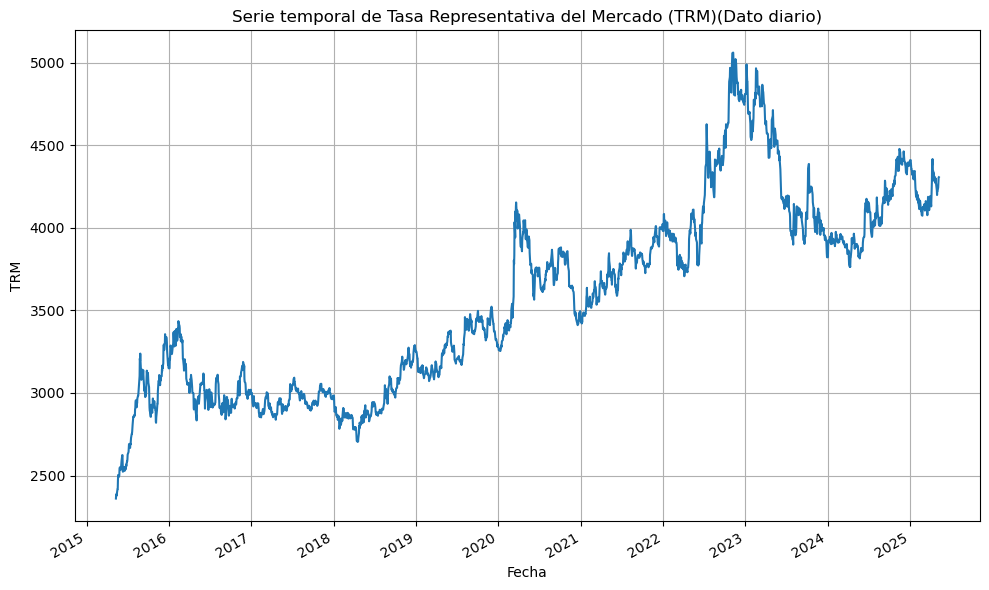

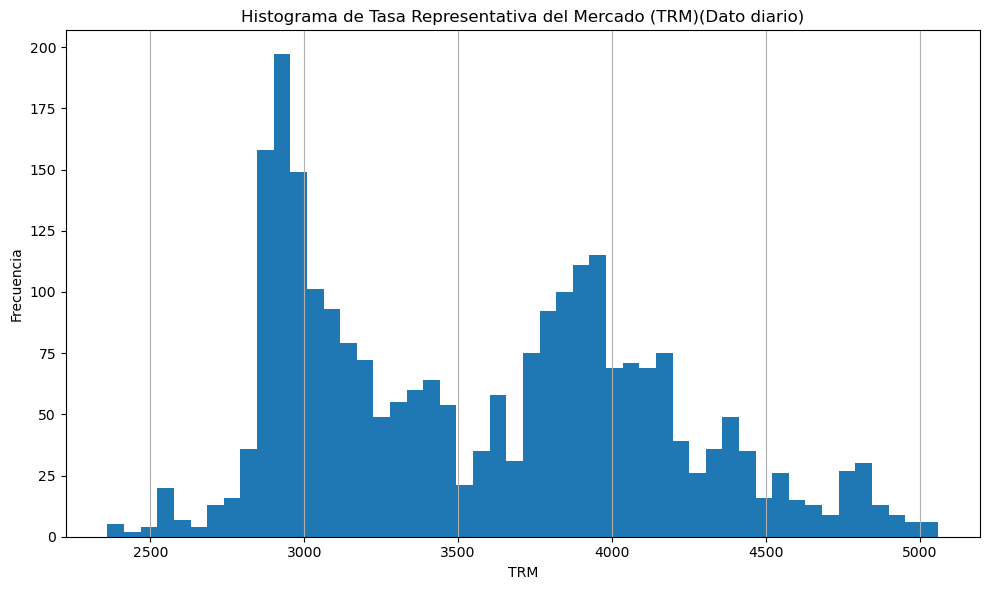

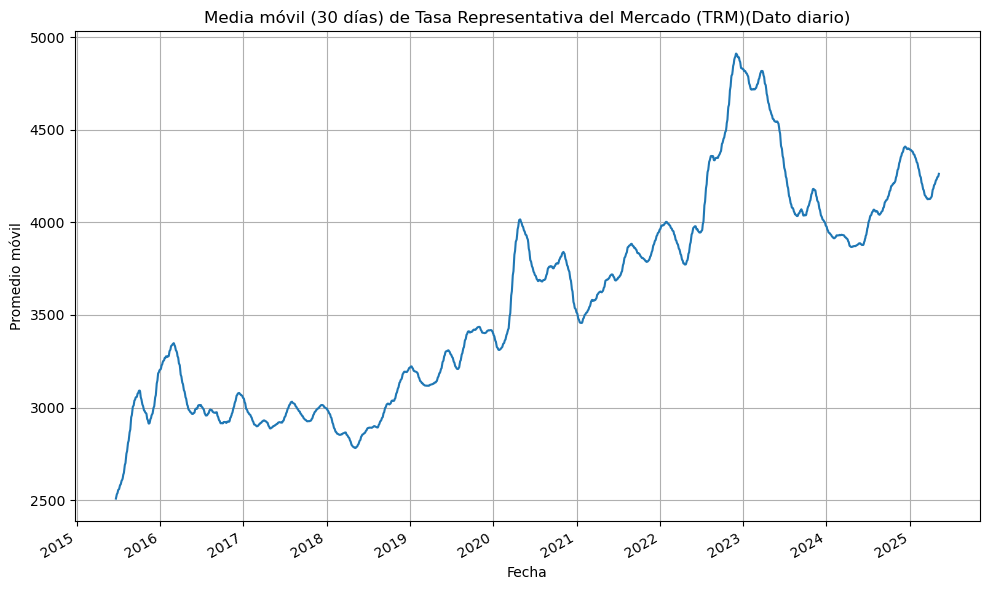

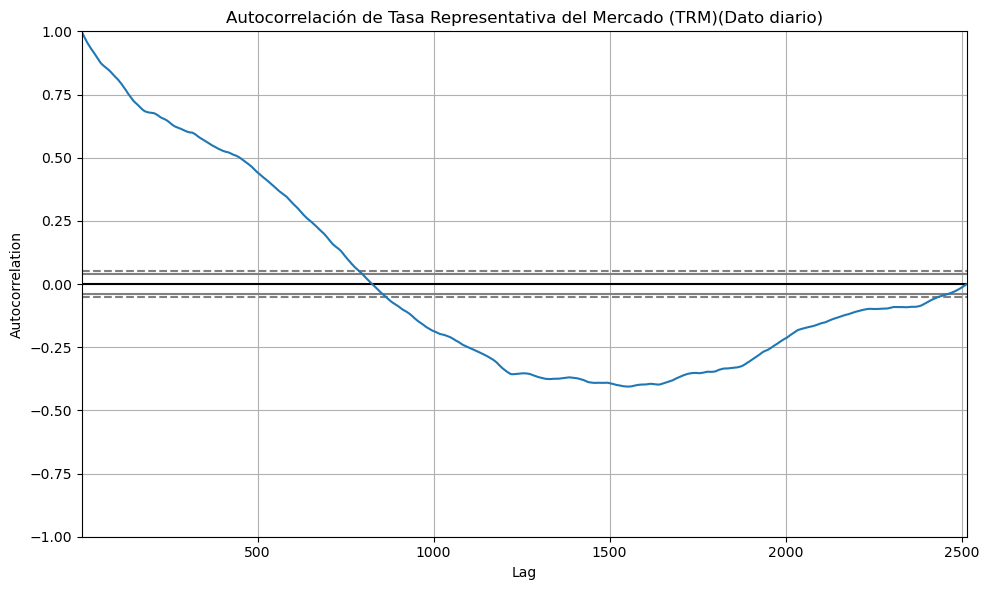

=== Prueba ADF para Tasa Representativa del Mercado (TRM)(Dato diario) ===
ADF Statistic: -1.6721
p-value: 0.4455

=== Prueba KPSS para Tasa Representativa del Mercado (TRM)(Dato diario) ===
KPSS Statistic: 6.9085
p-value: 0.0100



C:\Users\Usuario\AppData\Local\Temp\ipykernel_13416\3654128274.py:136: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_res = kpss(series, regression='c', nlags='auto')


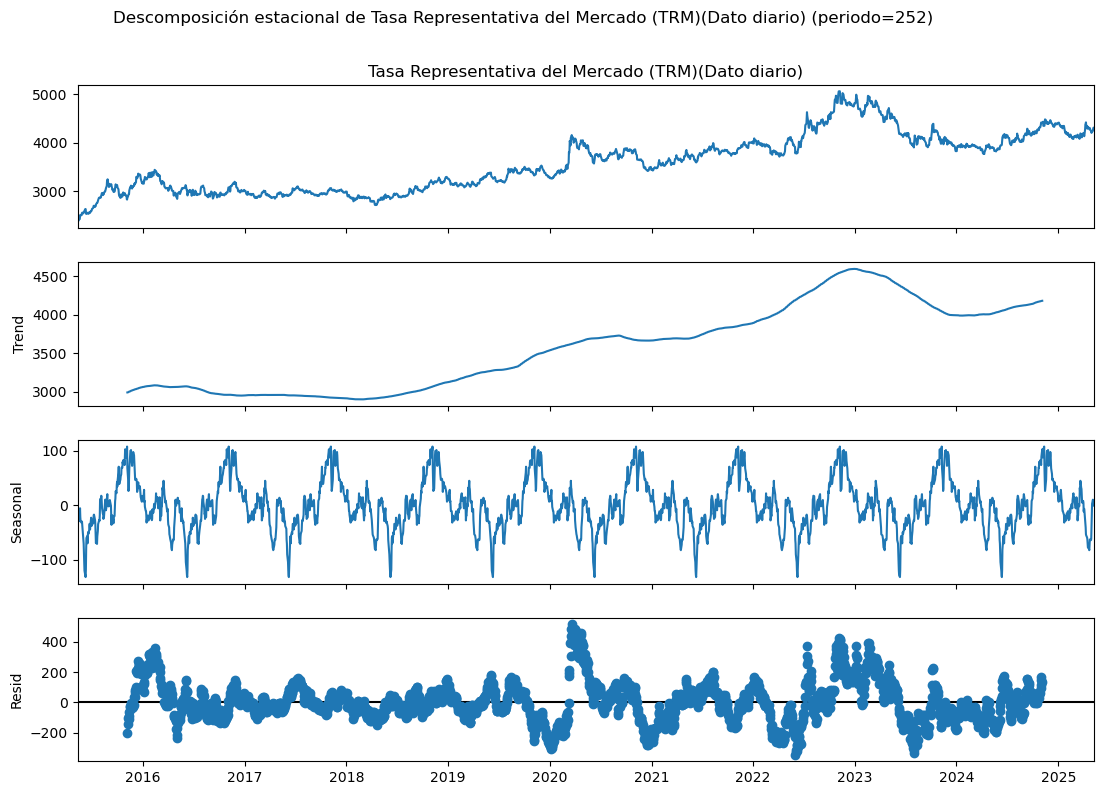

<Figure size 1000x600 with 0 Axes>

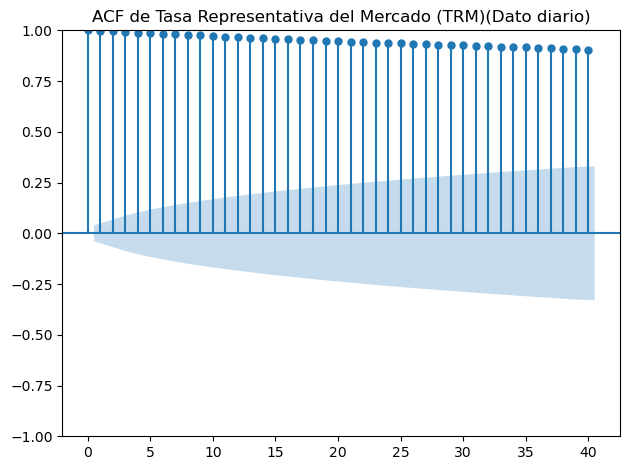

<Figure size 1000x600 with 0 Axes>

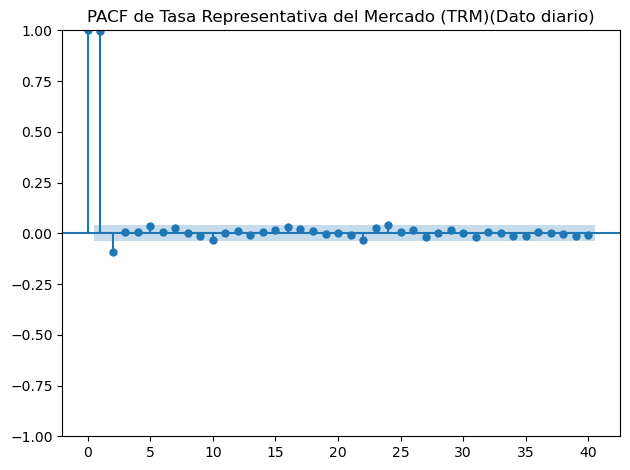


Análisis completado.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1) Prepara el DataFrame
df = df_merged.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Selecciona la serie
col = "Tasa Representativa del Mercado (TRM)(Dato diario)"

# --- Inicio de la SOLUCIÓN ---
print(f"Procesando la columna: '{col}'")

if col not in df.columns:
    print(f"ERROR CRÍTICO: La columna '{col}' NO existe en el DataFrame.")
    print(f"Columnas disponibles: {df.columns.tolist()}")
    # Salir si la columna no existe, ya que no se puede continuar.
    exit()

# Verificar el tipo de dato original
print(f"Tipo de dato original de '{col}': {df[col].dtype}")
original_non_null_count = df[col].count()

# Paso de limpieza y conversión a numérico
if df[col].dtype == 'object':
    print(f"La columna '{col}' es de tipo 'object'. Intentando convertir a numérico...")
    # Primero, intentar reemplazar comas por puntos (si la coma es el separador decimal)
    # y luego eliminar los puntos que podrían ser separadores de miles.
    # Esta es una suposición común para formatos numéricos en español.
    temp_series = df[col].astype(str) # Asegurar que es string para usar .str
    
    # Opción 1: Si el formato es "3.850,25" (punto miles, coma decimal)
    cleaned_series_opt1 = temp_series.str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    
    # Opción 2: Si el formato es "3,850.25" (coma miles, punto decimal)
    cleaned_series_opt2 = temp_series.str.replace(',', '', regex=False)

    # Intentar convertir con la Opción 1 primero
    numeric_series = pd.to_numeric(cleaned_series_opt1, errors='coerce')
    
    # Si muchos valores se volvieron NaN con la Opción 1, probar la Opción 2
    # (esto es heurístico, podrías necesitar ajustar la lógica según tus datos)
    if numeric_series.isnull().sum() > original_non_null_count * 0.8: # Si más del 80% se vuelve NaN
        print("La primera estrategia de limpieza resultó en muchos NaNs, intentando segunda estrategia (quitar comas).")
        numeric_series = pd.to_numeric(cleaned_series_opt2, errors='coerce')

    # Si aún así hay muchos NaNs, intentar conversión directa (por si ya está "limpio" pero es string)
    if numeric_series.isnull().sum() > original_non_null_count * 0.8:
        print("La segunda estrategia de limpieza también resultó en muchos NaNs, intentando conversión directa.")
        numeric_series = pd.to_numeric(temp_series, errors='coerce')

    df[col] = numeric_series
    print(f"Tipo de dato de '{col}' después de la conversión: {df[col].dtype}")
    if df[col].isnull().sum() > 0:
        print(f"Valores no numéricos o vacíos convertidos a NaN: {df[col].isnull().sum()}")
elif not pd.api.types.is_numeric_dtype(df[col]):
    # Si no es objeto pero tampoco numérico (raro, pero posible con tipos categóricos)
    print(f"La columna '{col}' no es de tipo 'object' pero tampoco numérica ({df[col].dtype}). Intentando forzar a numérico.")
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"Tipo de dato de '{col}' después del intento de forzar a numérico: {df[col].dtype}")

series = df[col].dropna()

if series.empty:
    print(f"ERROR CRÍTICO: La serie para '{col}' está vacía después de la limpieza y dropna().")
    print("Esto puede suceder si todos los valores eran no numéricos o NaN.")
    print("Verifica los datos originales en la columna.")
    exit() # No se puede graficar una serie vacía

if not pd.api.types.is_numeric_dtype(series):
    print(f"ERROR CRÍTICO: La serie para '{col}' no es de tipo numérico después de la limpieza (tipo: {series.dtype}).")
    print("Verifica los pasos de conversión.")
    exit() # No se puede graficar una serie no numérica

print(f"La serie para '{col}' está lista para graficar. Contiene {len(series)} puntos de datos.")
# --- Fin de la SOLUCIÓN ---


# 2) Estadísticos descriptivos
print(f"\n=== Estadísticos descriptivos de {col} ===")
print(series.describe(), "\n")

# 3) Serie temporal
plt.figure(figsize=(10,6)) # Ajustar tamaño para mejor visualización
series.plot()
plt.title(f"Serie temporal de {col}")
plt.xlabel("Fecha")
plt.ylabel("TRM")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4) Histograma
plt.figure(figsize=(10,6))
series.hist(bins=50) # Aumentar bins puede dar más detalle
plt.title(f"Histograma de {col}")
plt.xlabel("TRM")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5) Media móvil (30 días)
if len(series) >= 30:
    plt.figure(figsize=(10,6))
    series.rolling(window=30).mean().plot()
    plt.title(f"Media móvil (30 días) de {col}")
    plt.xlabel("Fecha")
    plt.ylabel("Promedio móvil")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes datos para la media móvil de 30 días.")

# 6) Autocorrelación (rápida)
plt.figure(figsize=(10,6))
autocorrelation_plot(series)
plt.title(f"Autocorrelación de {col}")
plt.tight_layout()
plt.show()

# 7) Prueba ADF
adf_res = adfuller(series)
print(f"=== Prueba ADF para {col} ===")
print(f"ADF Statistic: {adf_res[0]:.4f}")
print(f"p-value: {adf_res[1]:.4f}\n")

# 8) Prueba KPSS
try:
    kpss_res = kpss(series, regression='c', nlags='auto')
    print(f"=== Prueba KPSS para {col} ===")
    print(f"KPSS Statistic: {kpss_res[0]:.4f}")
    print(f"p-value: {kpss_res[1]:.4f}\n")
except Exception as e:
    print(f"Error al ejecutar prueba KPSS: {e}")


# 9) Descomposición estacional
# Ajustar 'period' según la frecuencia de tus datos (ej. 252 para días hábiles anuales, 12 para mensual, etc.)
# Se necesita al menos 2 * period observaciones.
periodo_descomposicion = 252
if len(series) >= 2 * periodo_descomposicion:
    decomp = seasonal_decompose(series, model='additive', period=periodo_descomposicion)
    fig = decomp.plot()
    fig.set_size_inches(12, 8) # Ajustar tamaño de la figura completa
    plt.suptitle(f"Descomposición estacional de {col} (periodo={periodo_descomposicion})", y=1.02)
    # plt.tight_layout() # A veces tight_layout no funciona bien con suptitle, ajustar manualmente o quitar
    plt.show()
else:
    print(f"No hay suficientes datos ({len(series)}) para la descomposición estacional con period={periodo_descomposicion}.")
    print("Se necesitan al menos ", 2 * periodo_descomposicion, " puntos.")

# Ajustar el número de lags para ACF y PACF si la serie es corta
num_lags = min(40, len(series) // 2 - 1)
if num_lags < 1:
    print(f"La serie es demasiado corta para calcular ACF/PACF con lags significativos. Lags calculados: {num_lags}")
else:
    # 10) ACF
    plt.figure(figsize=(10,6))
    plot_acf(series, lags=num_lags)
    plt.title(f"ACF de {col}")
    plt.tight_layout()
    plt.show()

    # 11) PACF
    plt.figure(figsize=(10,6))
    # El método 'ywm' (Yule-Walker modified) es común. 'ols' es otra opción.
    plot_pacf(series, lags=num_lags, method='ywm')
    plt.title(f"PACF de {col}")
    plt.tight_layout()
    plt.show()

print("\nAnálisis completado.")

In [ ]:
# import numpy as np

# # Parámetros
# window_size = 60
# columna = "Open_CIB" 

# # Extraemos la serie como array NumPy
# data = df_principal[columna].values  # forma (N,)

# # Construimos secuencias y etiquetas
# X, y = [], []
# for i in range(window_size, len(data)):
#     X.append(data[i-window_size:i])  # ventana de tamaño window_size
#     y.append(data[i])                # valor justo después de la ventana

# # Convertimos a arrays
# X = np.array(X)  # (N-window_size, window_size)
# y = np.array(y)  # (N-window_size,)

# print("X shape:", X.shape)
# print("y shape:", y.shape)



X shape: (2455, 60)
y shape: (2455,)


In [ ]:
# import numpy as np
# import pandas as pd

# # Columnas a imputar
# cols = [
#     'M1, mensual(Dato fin de mes)',
#     'Inflación total(Dato fin de mes)',
#     'Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)',
#     'Tasa de desempleo - total nacional(Dato fin de mes)'
# ]

# # 1) Reemplaza “–” por NaN y convierte a float
# df_merged[cols] = (
#     df_merged[cols]
#       .replace('-', np.nan)
#       .apply(pd.to_numeric, errors='coerce')
# )

# # 2) Asegúrate de que Date es datetime y está como índice
# df_merged['Date'] = pd.to_datetime(df_merged['Date'])
# df_merged = df_merged.set_index('Date').sort_index()

# # 3) Imputaciones según frecuencia/tipo de serie

# # — M1 y desempleo (mensuales, variación suave entre valores)
# df_merged['M1, mensual(Dato fin de mes)'] = (
#     df_merged['M1, mensual(Dato fin de mes)']
#       .interpolate(method='time')
# )
# df_merged['Tasa de desempleo - total nacional(Dato fin de mes)'] = (
#     df_merged['Tasa de desempleo - total nacional(Dato fin de mes)']
#       .interpolate(method='time')
# )

# # — Inflación total (se publica mes a mes; usar forward-fill)
# df_merged['Inflación total(Dato fin de mes)'] = (
#     df_merged['Inflación total(Dato fin de mes)']
#       .fillna(method='ffill')
# )

# # — Crecimiento PIB real trimestral (dato puntual por trimestre; propagar hasta el próximo)
# df_merged['Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)'] = (
#     df_merged['Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)']
#       .fillna(method='ffill')
# )

# # Listo: todas las series quedan completas
# print(df_merged.head(10))


            index   Open_CIB  \
Date                           
2015-05-11      0  21.649185   
2015-05-12      1  21.512008   
2015-05-13      2  21.687020   
2015-05-14      3  21.786349   
2015-05-15      4  21.672822   
2015-05-18      5  21.507280   
2015-05-19      6  21.431600   
2015-05-20      7  21.128885   
2015-05-21      8  21.218751   
2015-05-22      9  20.916033   

           Tasa Representativa del Mercado (TRM)(Dato diario)  \
Date                                                            
2015-05-11                                           2.360,58   
2015-05-12                                           2.381,53   
2015-05-13                                           2.386,77   
2015-05-14                                           2.377,87   
2015-05-15                                           2.389,49   
2015-05-18                                           2.417,01   
2015-05-19                                           2.417,01   
2015-05-20                    

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11880\2528835035.py:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11880\2528835035.py:44: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method='ffill')


## analisis univariado de CIB

## analisiis bivariado

In [9]:
import pandas as pd
import numpy as np

# --- 0. Preparar DataFrame ---
# Si tu DataFrame tiene columna 'Date', úsala como índice
if 'Date' in df_merged.columns:
    df_merged['Date'] = pd.to_datetime(df_merged['Date'])
    df_merged.set_index('Date', inplace=True)

# Asegúrate de que el índice sea de tipo datetime
if not isinstance(df_merged.index, pd.DatetimeIndex):
    df_merged.index = pd.to_datetime(df_merged.index)

# Columnas de interés y limpieza inicial
col_open = 'Open_CIB'
macros = {
    'M1, mensual(Dato fin de mes)': 'M',
    'Inflación total(Dato fin de mes)': 'M',
    'Tasa de desempleo - total nacional(Dato fin de mes)': 'M',
    'Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)': 'Q'
}
diarias = [
    'Tasa de política monetaria(Dato diario)'
]

# --- Limpieza robusta de columnas numéricas ---
def clean_generic(series):
    s = series.astype(str)
    s = s.str.replace(r'[^0-9\.,\-]', '', regex=True)
    s = s.str.replace(',', '.', regex=False)
    return pd.to_numeric(s, errors='coerce')

for col in [col_open] + list(macros.keys()) + diarias:
    if col in df_merged.columns:
        df_merged[col] = clean_generic(df_merged[col])

# Diccionario para almacenar DataFrames por par
dict_pair_dfs = {}

# --- 1. Preparar la serie diaria de Open_CIB ---
open_daily = df_merged[col_open].dropna()

# --- 2. Generar DataFrames para variables mensuales y trimestrales ---
for col_macro, freq in macros.items():
    macro_series = df_merged[col_macro].dropna()
    # Alinear Open_CIB a fechas macro con forward-fill
    open_aligned = open_daily.reindex(macro_series.index, method='ffill')
    # Filtrar solo valores válidos en ambas series
    mask = open_aligned.notna() & macro_series.notna()
    df_pair = pd.DataFrame({
        'Date': open_aligned.index[mask],
        col_open: open_aligned[mask].values,
        col_macro: macro_series[mask].values
    })
    key = f"{col_open}_vs_{col_macro}"
    dict_pair_dfs[key] = df_pair
    print(f"DataFrame '{key}' creado con {len(df_pair)} observaciones.")

# --- 3. Generar DataFrame para variable diaria ---
# Solo Tasa de política monetaria
col_daily = diarias[0]
daily_series = df_merged[col_daily].dropna()
common_idx = open_daily.index.intersection(daily_series.index)
open_matched = open_daily.reindex(common_idx)
daily_matched = daily_series.reindex(common_idx)
df_pol = pd.DataFrame({
    'Date': common_idx,
    col_open: open_matched.values,
    col_daily: daily_matched.values
})
key_pol = f"{col_open}_vs_{col_daily}"
dict_pair_dfs[key_pol] = df_pol
print(f"DataFrame '{key_pol}' creado con {len(df_pol)} observaciones.")

# --- 4. Mostrar claves disponibles ---
print("\nClaves en dict_pair_dfs:", list(dict_pair_dfs.keys()))



DataFrame 'Open_CIB_vs_M1, mensual(Dato fin de mes)' creado con 85 observaciones.
DataFrame 'Open_CIB_vs_Inflación total(Dato fin de mes)' creado con 86 observaciones.
DataFrame 'Open_CIB_vs_Tasa de desempleo - total nacional(Dato fin de mes)' creado con 85 observaciones.
DataFrame 'Open_CIB_vs_Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)' creado con 26 observaciones.
DataFrame 'Open_CIB_vs_Tasa de política monetaria(Dato diario)' creado con 2514 observaciones.

Claves en dict_pair_dfs: ['Open_CIB_vs_M1, mensual(Dato fin de mes)', 'Open_CIB_vs_Inflación total(Dato fin de mes)', 'Open_CIB_vs_Tasa de desempleo - total nacional(Dato fin de mes)', 'Open_CIB_vs_Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)', 'Open_CIB_vs_Tasa de política monetaria(Dato diario)']


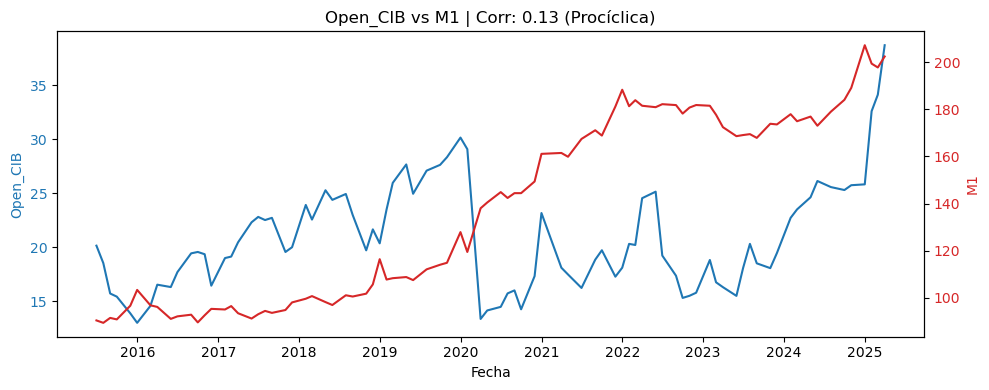

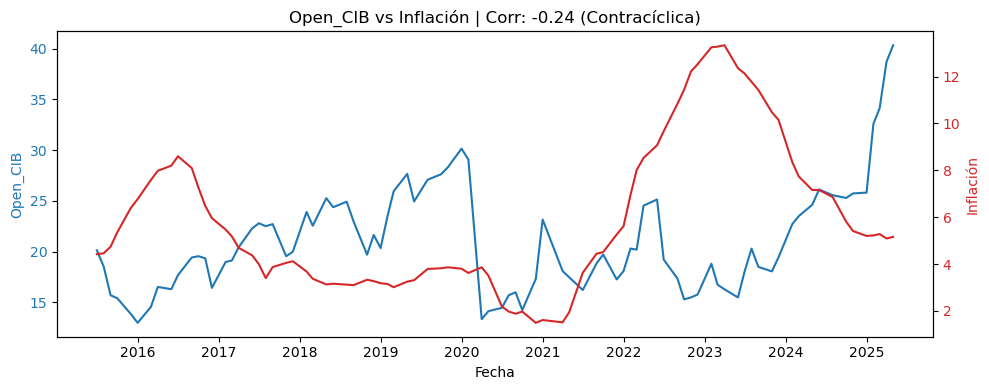

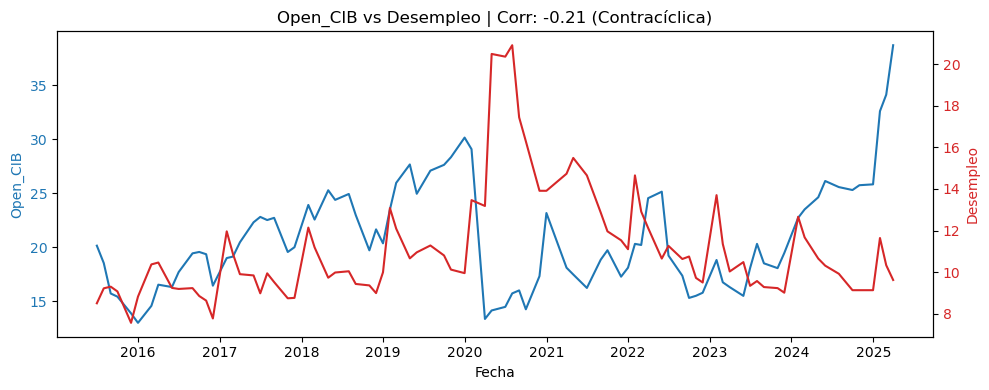

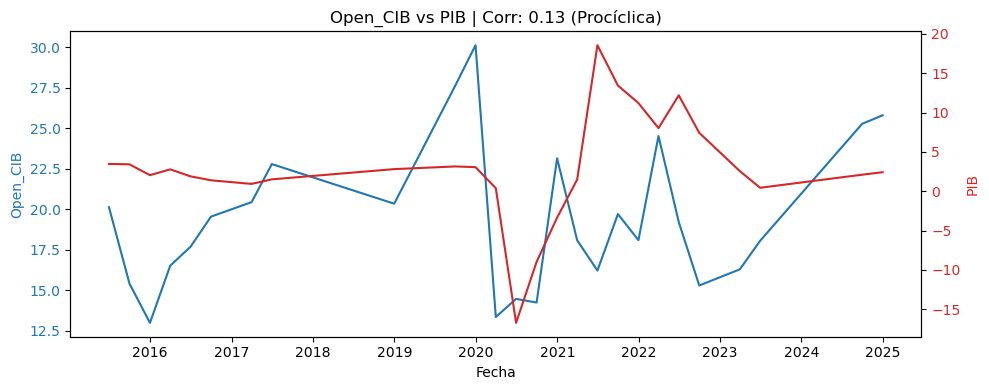

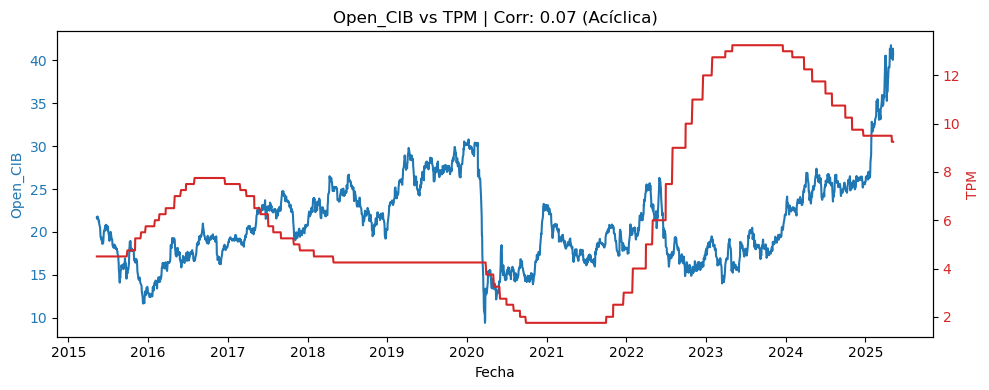

Open_CIB vs M1: Corr = 0.133, p-valor = 0.2257, Clasificación: Procíclica
Open_CIB vs Inflación: Corr = -0.240, p-valor = 0.0258, Clasificación: Contracíclica
Open_CIB vs Desempleo: Corr = -0.206, p-valor = 0.0585, Clasificación: Contracíclica
Open_CIB vs PIB: Corr = 0.130, p-valor = 0.5276, Clasificación: Procíclica
Open_CIB vs TPM: Corr = 0.073, p-valor = 0.0003, Clasificación: Acíclica


In [10]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Diccionario de nombres cortos para variables
nombre_corto = {
    'M1, mensual(Dato fin de mes)': 'M1',
    'Inflación total(Dato fin de mes)': 'Inflación',
    'Tasa de desempleo - total nacional(Dato fin de mes)': 'Desempleo',
    'Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre)': 'PIB',
    'Tasa de política monetaria(Dato diario)': 'TPM',
    'Open_CIB': 'Open_CIB'
}

def analizar_correlaciones(df_dict, corr_lim=0.1):
    resumen = []
    for key, df in df_dict.items():
        if len(df) < 2:
            continue

        df = df.dropna()
        df = df.set_index('Date')

        if df.shape[1] != 2:
            continue

        var1, var2 = df.columns
        serie1 = df[var1]
        serie2 = df[var2]

        # Cálculo de correlación
        corr, pval = pearsonr(serie1, serie2)

        if corr > corr_lim:
            tipo = "Procíclica"
        elif corr < -corr_lim:
            tipo = "Contracíclica"
        else:
            tipo = "Acíclica"

        resumen.append((nombre_corto.get(var1, var1), nombre_corto.get(var2, var2), corr, pval, tipo))

        # --- Gráfico con nombres cortos ---
        fig, ax1 = plt.subplots(figsize=(10, 4))
        color1, color2 = 'tab:blue', 'tab:red'

        ax1.set_xlabel('Fecha')
        ax1.set_ylabel(nombre_corto.get(var1, var1), color=color1)
        ax1.plot(df.index, serie1, color=color1)
        ax1.tick_params(axis='y', labelcolor=color1)

        ax2 = ax1.twinx()
        ax2.set_ylabel(nombre_corto.get(var2, var2), color=color2)
        ax2.plot(df.index, serie2, color=color2)
        ax2.tick_params(axis='y', labelcolor=color2)

        plt.title(f"{nombre_corto.get(var1, var1)} vs {nombre_corto.get(var2, var2)} | Corr: {corr:.2f} ({tipo})")
        plt.tight_layout()
        plt.show()

    return resumen

# Ejecutar análisis
resultados = analizar_correlaciones(dict_pair_dfs)

# Mostrar resumen
for var1, var2, corr, pval, tipo in resultados:
    print(f"{var1} vs {var2}: Corr = {corr:.3f}, p-valor = {pval:.4f}, Clasificación: {tipo}")



In [15]:
import pandas as pd
from scipy.stats import pearsonr

# Preparar df_trm
df_trm = df_merged[['Open_CIB', 'Tasa Representativa del Mercado (TRM)(Dato diario)']].copy()
df_trm.columns = ['Open_CIB', 'TRM']

# # Convertir a numérico y limpiar
# df_trm['Open_CIB'] = pd.to_numeric(df_trm['Open_CIB'], errors='coerce')
# df_trm['TRM'] = pd.to_numeric(df_trm['TRM'], errors='coerce')
# df_trm = df_trm.dropna().reset_index()  # Recupera índice como 'Date'

# # Diccionario para análisis
# dict_pair_dfs_trm = {'Open_CIB_vs_TRM': df_trm[['Date', 'Open_CIB', 'TRM']]}

# def analizar_correlaciones(df_dict, corr_lim=0.1):
#     from scipy.stats import pearsonr
#     resultados = []
#     for nombre, df in df_dict.items():
#         var1, var2 = df.columns[1], df.columns[2]  # omitir 'Date'
#         serie1 = df[var1].dropna()
#         serie2 = df[var2].dropna()

#         # Hacer intersección de índices para que sean comparables
#         common_index = serie1.index.intersection(serie2.index)
#         serie1 = serie1.loc[common_index]
#         serie2 = serie2.loc[common_index]

#         print(f"{nombre}: longitud serie1 = {len(serie1)}, serie2 = {len(serie2)}")

#         if len(serie1) < 2 or len(serie2) < 2:
#             print(f"Skipping {nombre} porque no tiene suficientes datos para correlación.")
#             continue

#         corr, pval = pearsonr(serie1, serie2)

#         # Clasificación simple
#         if abs(corr) > corr_lim:
#             tipo = "Procíclica" if corr > 0 else "Contracíclica"
#         else:
#             tipo = "Acíclica"

#         resultados.append((var1, var2, corr, pval, tipo))
#     return resultados


# # Ejecutar análisis
# resultados = analizar_correlaciones(dict_pair_dfs_trm)

# # Mostrar resumen
# for var1, var2, corr, pval, tipo in resultados:
#     print(f"{var1} vs {var2}: Corr = {corr:.3f}, p-valor = {pval:.4f}, Clasificación: {tipo}")



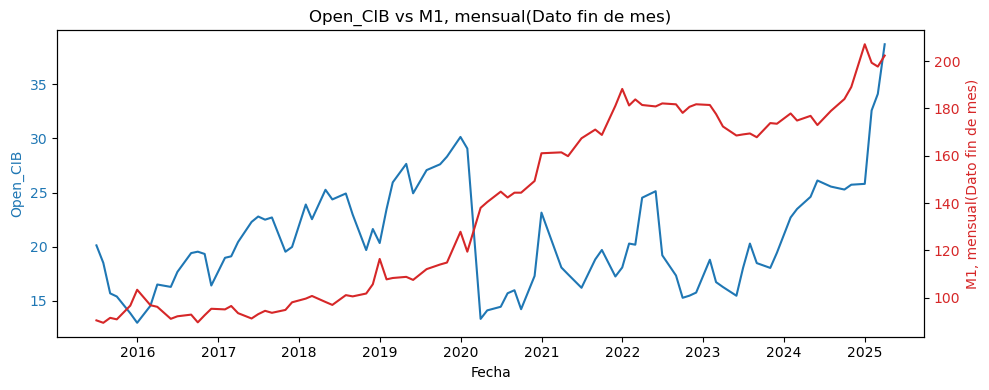


--- Prueba de Causalidad de Granger: M1, mensual(Dato fin de mes) ➜ Open_CIB ---
Hipótesis nula: M1, mensual(Dato fin de mes) NO causa Granger a Open_CIB
Hipótesis alternativa: M1, mensual(Dato fin de mes) SÍ causa Granger a Open_CIB
Lag 1: p-value = 0.1830 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 2: p-value = 0.0403 → Rechazamos H₀ ⇒ Existe causalidad de Granger.
Lag 3: p-value = 0.0569 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 4: p-value = 0.0884 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.


c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


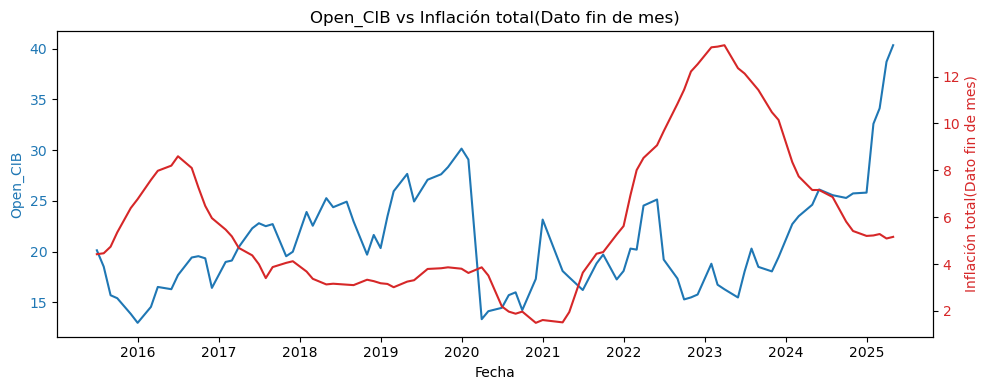


--- Prueba de Causalidad de Granger: Inflación total(Dato fin de mes) ➜ Open_CIB ---
Hipótesis nula: Inflación total(Dato fin de mes) NO causa Granger a Open_CIB
Hipótesis alternativa: Inflación total(Dato fin de mes) SÍ causa Granger a Open_CIB
Lag 1: p-value = 0.9629 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 2: p-value = 0.7714 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 3: p-value = 0.8944 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 4: p-value = 0.6988 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.


c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


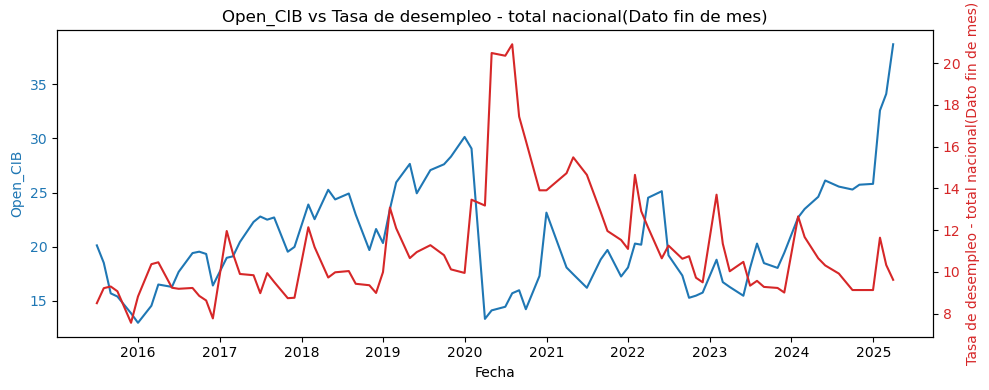


--- Prueba de Causalidad de Granger: Tasa de desempleo - total nacional(Dato fin de mes) ➜ Open_CIB ---
Hipótesis nula: Tasa de desempleo - total nacional(Dato fin de mes) NO causa Granger a Open_CIB
Hipótesis alternativa: Tasa de desempleo - total nacional(Dato fin de mes) SÍ causa Granger a Open_CIB
Lag 1: p-value = 0.4720 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 2: p-value = 0.1719 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 3: p-value = 0.1097 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 4: p-value = 0.2087 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.


c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


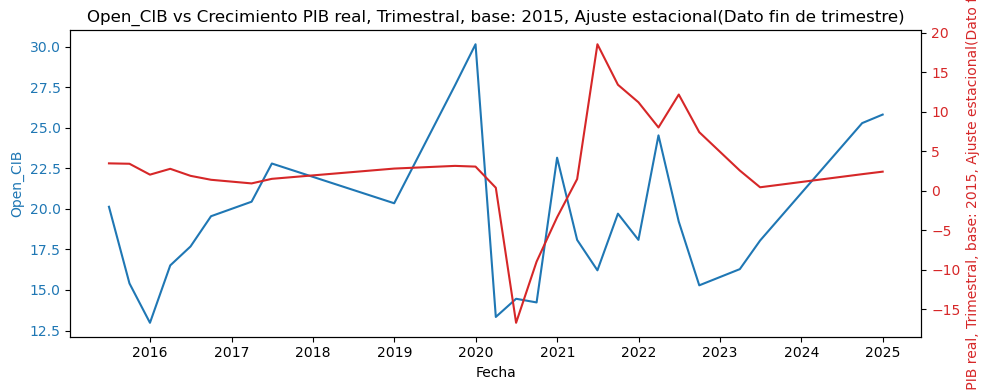


--- Prueba de Causalidad de Granger: Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre) ➜ Open_CIB ---
Hipótesis nula: Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre) NO causa Granger a Open_CIB
Hipótesis alternativa: Crecimiento PIB real, Trimestral, base: 2015, Ajuste estacional(Dato fin de trimestre) SÍ causa Granger a Open_CIB
Lag 1: p-value = 0.9838 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 2: p-value = 0.6344 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 3: p-value = 0.4970 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 4: p-value = 0.5907 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.


c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


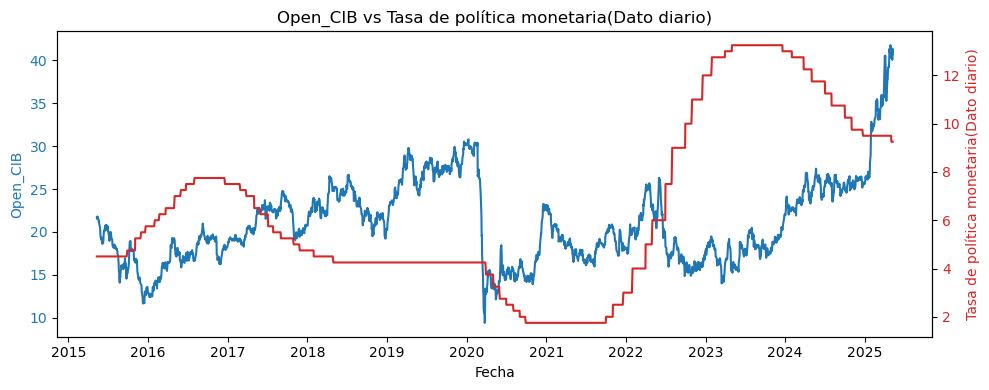


--- Prueba de Causalidad de Granger: Tasa de política monetaria(Dato diario) ➜ Open_CIB ---
Hipótesis nula: Tasa de política monetaria(Dato diario) NO causa Granger a Open_CIB
Hipótesis alternativa: Tasa de política monetaria(Dato diario) SÍ causa Granger a Open_CIB
Lag 1: p-value = 0.1818 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 2: p-value = 0.3673 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 3: p-value = 0.5939 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.
Lag 4: p-value = 0.6935 → No se rechaza H₀ ⇒ No hay evidencia de causalidad.


c:\Users\Usuario\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import grangercausalitytests

# def analyze_granger_and_plot(dataframes_dict, max_lag=4, alpha=0.05):
#     results = {}
#     for key, df in dataframes_dict.items():
#         if len(df) < max_lag + 1:
#             print(f"Saltando '{key}' por datos insuficientes ({len(df)} observaciones).")
#             continue

#         df = df.dropna()
#         df = df.set_index('Date')

#         if df.shape[1] != 2:
#             print(f"Saltando '{key}': no contiene exactamente dos columnas de series.")
#             continue

#         series1, series2 = df.columns.tolist()

#         # --- Gráfica con doble eje Y ---
#         fig, ax1 = plt.subplots(figsize=(10, 4))

#         color1 = 'tab:blue'
#         color2 = 'tab:red'

#         ax1.set_xlabel('Fecha')
#         ax1.set_ylabel(series1, color=color1)
#         ax1.plot(df.index, df[series1], color=color1)
#         ax1.tick_params(axis='y', labelcolor=color1)

#         ax2 = ax1.twinx()
#         ax2.set_ylabel(series2, color=color2)
#         ax2.plot(df.index, df[series2], color=color2)
#         ax2.tick_params(axis='y', labelcolor=color2)

#         plt.title(f'{series1} vs {series2}')
#         plt.tight_layout()
#         plt.show()

#         # --- Granger ---
#         try:
#             print(f"\n--- Prueba de Causalidad de Granger: {series2} ➜ {series1} ---")
#             print(f"Hipótesis nula: {series2} NO causa Granger a {series1}")
#             print(f"Hipótesis alternativa: {series2} SÍ causa Granger a {series1}")

#             test_result = grangercausalitytests(df[[series1, series2]], maxlag=max_lag, verbose=False)
#             for lag, res in test_result.items():
#                 p_value = res[0]['ssr_ftest'][1]
#                 print(f"Lag {lag}: p-value = {p_value:.4f} → ", end='')
#                 if p_value < alpha:
#                     print("Rechazamos H₀ ⇒ Existe causalidad de Granger.")
#                 else:
#                     print("No se rechaza H₀ ⇒ No hay evidencia de causalidad.")
#             results[key] = test_result
#         except Exception as e:
#             print(f"Error en prueba de Granger para '{key}': {e}")

#     return results

# # Ejecutar análisis
# results_summary = analyze_granger_and_plot(dict_pair_dfs, max_lag=4)
